In [20]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
from sklearn import preprocessing
from mgcpy.independence_tests.mgc.mgc import MGC

In [27]:
'''
data info: annual salary information for all active, permanent employees of 
           Montgomery County, MD paid in calendar year 2017.
'''
salary_data = pd.read_csv('salary_data.csv')

# prepare data

# # convert catergorical data to numerical
# salary_data["Gender Codes"] = salary_data["Gender"].astype('category').cat.codes + 1
# salary_data["Department Codes"] = salary_data["Department"].astype('category').cat.codes + 1

# pull out data
salaries = salary_data["Current Annual Salary"].values
gender_lables = salary_data["Gender"].values
department_labels = salary_data["Department"].values

men_salaries = salary_data.loc[salary_data['Gender'] == "M"]["Current Annual Salary"].values
women_salaries = salary_data.loc[salary_data['Gender'] == "F"]["Current Annual Salary"].values

/usr/local/var/pyenv/versions/py3/envs/ML/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


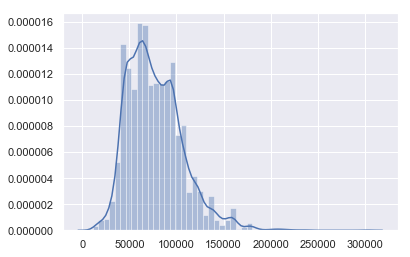

In [3]:
# men salary distribution
sns.distplot(men_salaries)

/usr/local/var/pyenv/versions/py3/envs/ML/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


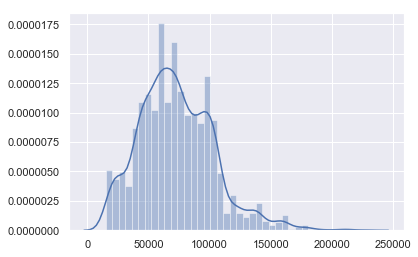

In [4]:
# women salary distribution
sns.distplot(women_salaries)

In [5]:
def transform_matrices(x, y, is_y_categorical=False):
    if not is_y_categorical:
        u = np.concatenate([x, y], axis=0)
        v = np.concatenate([np.repeat(1, x.shape[0]), np.repeat(2, y.shape[0])], axis=0)
    else:
        u = x
        v = preprocessing.LabelEncoder().fit_transform(y) + 1
    
    if len(u.shape) == 1:
        u = u[..., np.newaxis]
    if len(v.shape) == 1:
        v = v[..., np.newaxis]
    
    return u, v

In [8]:
# two sample testing using MGC
u, v = transform_matrices(np.random.choice(men_salaries, 1000), np.random.choice(women_salaries, 1000))
mgc = MGC()
p_value, p_value_metadata = mgc.p_value(u, v, is_fast=True)

In [9]:
p_value

0.0

In [10]:
p_value_metadata

{'test_statistic': 0.01640452474818155,
 'local_correlation_matrix': array([[0.01472744, 0.01470491],
        [0.01340916, 0.01338094],
        [0.01378996, 0.01375814],
        ...,
        [0.00393913, 0.00393728],
        [0.00412217, 0.00412186],
        [0.00397569, 0.00397669]]),
 'optimal_scale': [64, 1]}

Departments: ['BOA' 'BOE' 'CAT' 'CCL' 'CEC' 'CEX' 'COR' 'CUS' 'DEP' 'DGS' 'DHS' 'DLC'
 'DOT' 'DPS' 'DTS' 'ECM' 'FIN' 'FRS' 'HCA' 'HHS' 'HRC' 'IGR' 'LIB' 'MPB'
 'NDA' 'OAG' 'OCP' 'OHR' 'OIG' 'OLO' 'OMB' 'PIO' 'POL' 'PRO' 'REC' 'SHF'
 'ZAH']


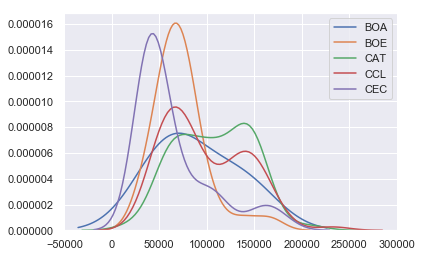

In [71]:
# visualize the data
print("Departments:", np.unique(department_labels))

department_wise_salaries = [salary_data.loc[salary_data['Department'] == dep]["Current Annual Salary"].values for dep in np.unique(department_labels)]

# plot 5 random department-wise salary distributions
fig, ax = plt.subplots()
for l, s in zip(np.unique(department_labels)[:5], department_wise_salaries[:5]):
    sns.distplot(s, ax=ax, hist=False, label=l)
    

In [49]:
# k-sample testing using MGC
u, v = transform_matrices(salaries[:100], department_labels[:100], is_y_categorical=True)
mgc = MGC()
p_value, p_value_metadata = mgc.p_value(u, v)

In [50]:
p_value

0.0

In [51]:
p_value_metadata

{'test_statistic': 0.15193846535370412,
 'p_local_correlation_matrix': array([[0.   , 0.   , 0.001, ..., 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
        ...,
        [0.   , 0.   , 0.   , ..., 0.063, 0.063, 0.065],
        [0.   , 0.   , 0.   , ..., 0.085, 0.078, 0.075],
        [0.   , 0.   , 0.   , ..., 0.079, 0.073, 0.072]]),
 'local_correlation_matrix': array([[0.0883209 , 0.06468189, 0.06041107, ..., 0.04890049, 0.04889527,
         0.04889206],
        [0.09720308, 0.06985014, 0.07411348, ..., 0.06429916, 0.06441863,
         0.06444804],
        [0.09420236, 0.07316739, 0.07662082, ..., 0.06690257, 0.06708685,
         0.06713342],
        ...,
        [0.11425204, 0.11954029, 0.09023072, ..., 0.02738428, 0.02726118,
         0.02689307],
        [0.12623691, 0.13154411, 0.10540815, ..., 0.02240928, 0.02318544,
         0.02339083],
        [0.11026699, 0.12858525, 0.1054489 , ..., 0.

In [52]:
# verify if two sample tests work
# generate 100 samples from the same distribution
x = np.random.randn(100)

# assign half of them as samples from 1 and the other half as samples from 2
y = np.concatenate([np.repeat(1, 50), np.repeat(2, 50)], axis=0)

/usr/local/var/pyenv/versions/py3/envs/ML/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


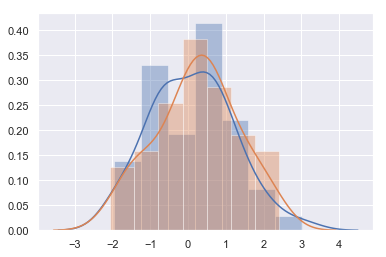

In [58]:
# random normal distribution
sns.distplot(x[:51]) # label 1
sns.distplot(x[51:]) # label 2

In [53]:
# use MGC to perform independence test
u, v = transform_matrices(x, y, is_y_categorical=True)
mgc = MGC()
p_value, p_value_metadata = mgc.p_value(u, v)

/usr/local/var/pyenv/versions/py3/envs/ML/lib/python3.6/site-packages/mgcpy-0.2.0-py3.6-macosx-10.13-x86_64.egg/mgcpy/independence_tests/abstract_class.py:154: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  "Use results such as test_statistic and optimal_scale, with caution!")


In [54]:
p_value

0.8190000000000006

In [55]:
p_value_metadata["test_statistic"]

-0.010386913847924466